In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn")

In [45]:
df = yf.download("TSLA", start="2010-01-01", end="2020-04-30")

[*********************100%***********************]  1 of 1 completed


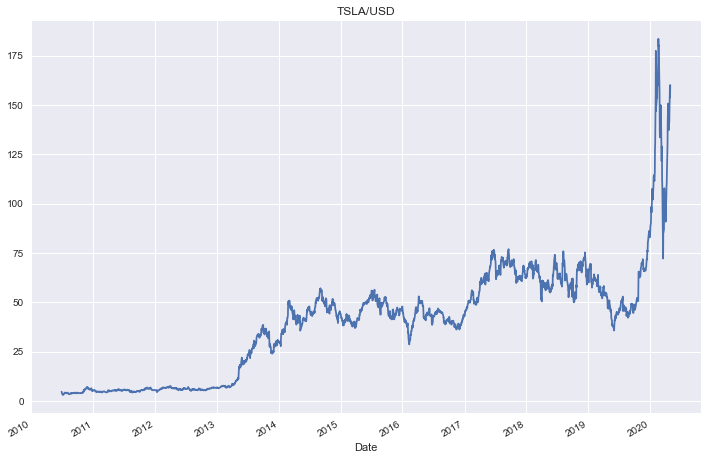

In [46]:
df['Close'].plot(figsize=(12,8), title='TSLA/USD', fontsize=10)

In [47]:
# sma short and long
sma_s = 50
sma_l = 200

In [48]:
df['SMA_S'] = df['Close'].rolling(sma_s).mean()
df['SMA_L'] = df['Close'].rolling(sma_l).mean()

In [49]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_S,SMA_L
Date,,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,NaN,NaN
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,NaN,NaN
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,NaN,NaN
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,NaN,NaN
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-04-23,145.520004,146.800003,140.626007,141.126007,141.126007,66183500,128.26972,83.08725
2020-04-24,142.162003,146.145996,139.636002,145.029999,145.029999,66060000,128.10116,83.57348
2020-04-27,147.522003,159.897995,147.000000,159.750000,159.750000,103407000,128.08016,84.13363


In [50]:
df.dropna(inplace=True)

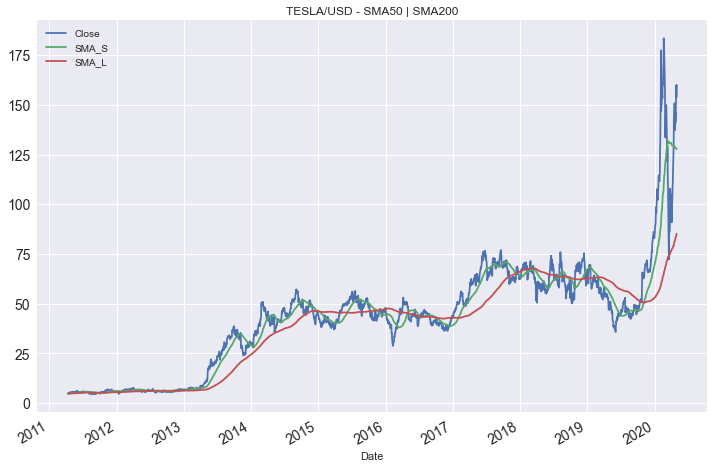

In [51]:
df[['Close', 'SMA_S', 'SMA_L']].plot(figsize=(12,8), 
                                    title='TESLA/USD - SMA{} | SMA{}'.format(sma_s, sma_l),
                                    fontsize=14)
plt.legend()
plt.show()

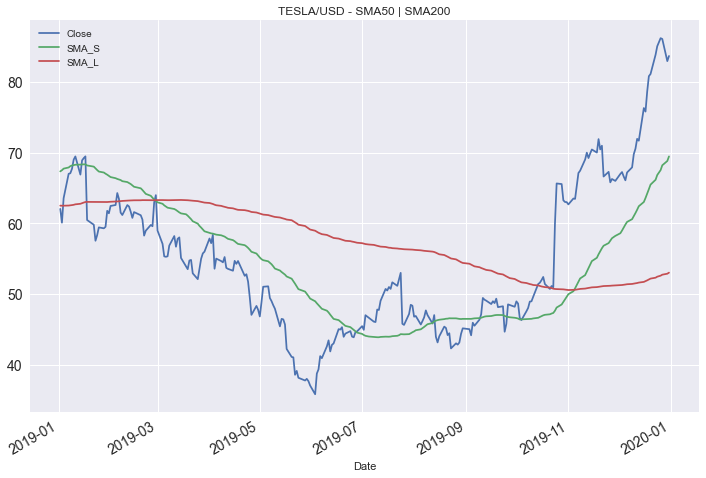

In [52]:
df['2019'][['Close', 'SMA_S', 'SMA_L']].plot(figsize=(12,8), 
                                    title='TESLA/USD - SMA{} | SMA{}'.format(sma_s, sma_l),
                                    fontsize=14)
plt.legend()
plt.show()

In [53]:
df["isLong"] = np.where(df["SMA_S"] > df["SMA_L"], 1, -1)